# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv0 as e
import seaborn as sns
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

1/3 -- 0.33475494384765625
0.35 -- 0.36702728271484375
0.4 -- 0.47370147705078125
0.45 -- 0.6032638549804688

In [9]:
env = e.Environment(0.45, 9)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

In [10]:
rho = 0.6032638549804688
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    if reward > 1:
        return 1
    if reward < -1:
        return -1
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 100	Average Score: -0.14
0.9900493386913721


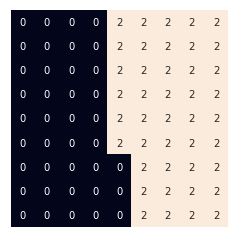

Episode 200	Average Score: -0.25
0.980197693043223


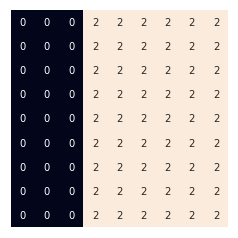

Episode 300	Average Score: -0.18
0.970444077784251


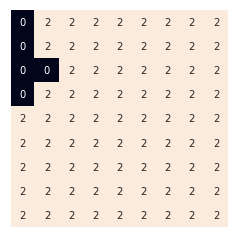

Episode 400	Average Score: -0.16
0.9607875174472562


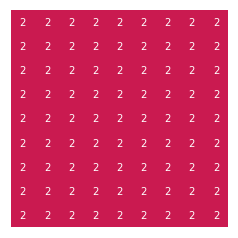

Episode 500	Average Score: -0.28
0.9512270462715811


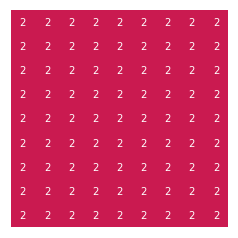

Episode 600	Average Score: -0.28
0.9417617081065252


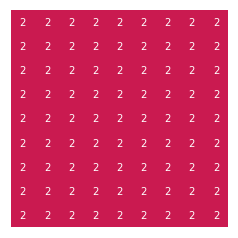

Episode 700	Average Score: -0.14
0.9323905563157222


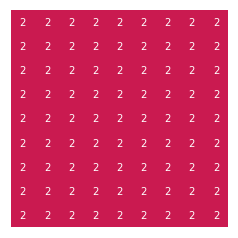

Episode 800	Average Score: -0.22
0.9231126536824614


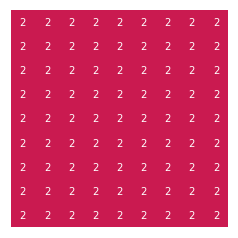

Episode 900	Average Score: -0.18
0.9139270723159584


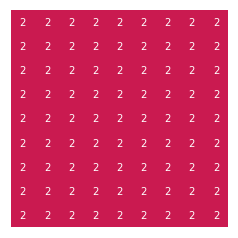

Episode 1000	Average Score: -0.32
0.9048328935585562


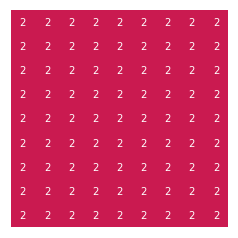

Episode 1100	Average Score: -0.22
0.8958292078938495


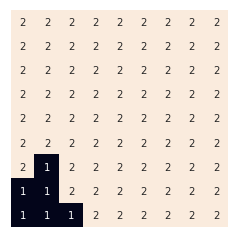

Episode 1200	Average Score: -0.16
0.886915114855721


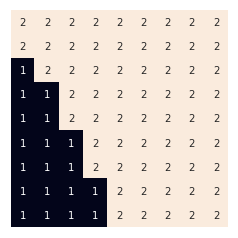

Episode 1300	Average Score: -0.23
0.8780897229382887


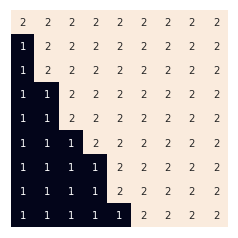

Episode 1400	Average Score: -0.22
0.8693521495067424


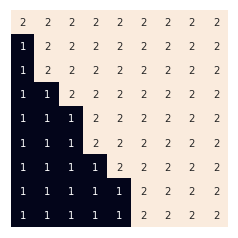

Episode 1500	Average Score: -0.17
0.8607015207090729


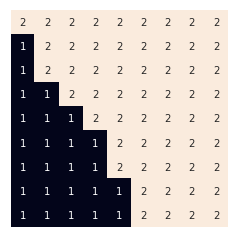

Episode 1600	Average Score: -0.10
0.8521369713886755


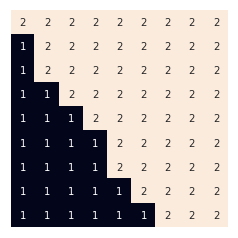

Episode 1700	Average Score: -0.16
0.843657644997827


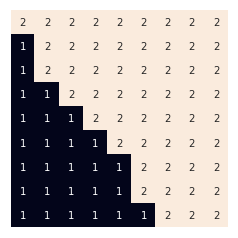

Episode 1800	Average Score: -0.14
0.8352626935120188


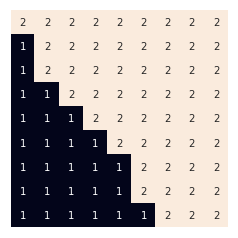

Episode 1900	Average Score: -0.10
0.8269512773451482


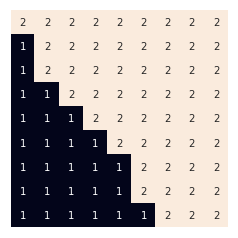

Episode 2000	Average Score: -0.23
0.8187225652655491


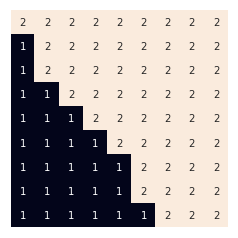

Episode 2100	Average Score: 0.010
0.8105757343128605


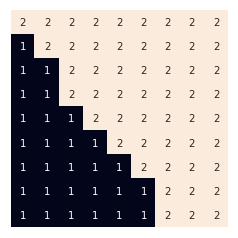

Episode 2200	Average Score: -0.25
0.8025099697157205


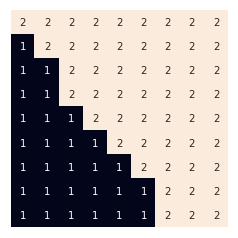

Episode 2300	Average Score: -0.13
0.7945244648102819


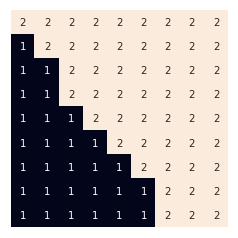

Episode 2400	Average Score: -0.19
0.7866184209595359


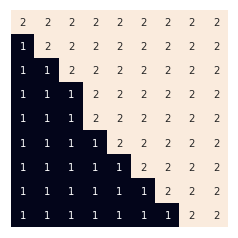

Episode 2500	Average Score: -0.18
0.7787910474734399


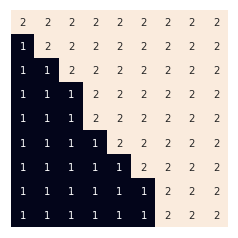

Episode 2600	Average Score: -0.16
0.7710415615298397


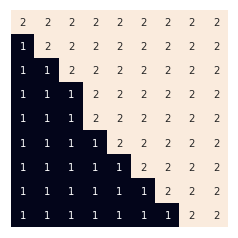

Episode 2700	Average Score: -0.22
0.7633691880961806


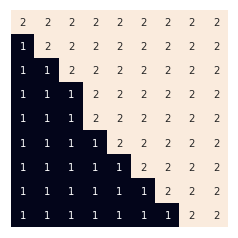

Episode 2800	Average Score: -0.14
0.7557731598519929


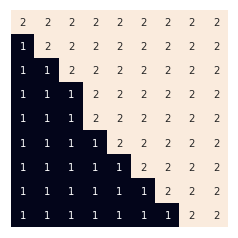

Episode 2900	Average Score: -0.17
0.748252717112154


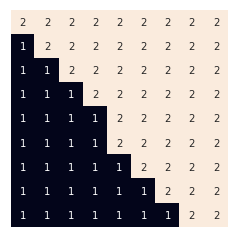

Episode 3000	Average Score: -0.14
0.74080710775091


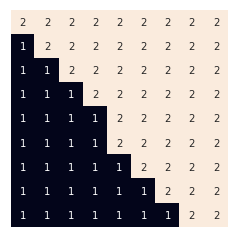

Episode 3100	Average Score: -0.12
0.7334355871266565


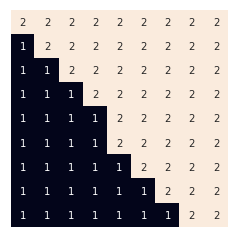

Episode 3200	Average Score: -0.16
0.7261374180074647


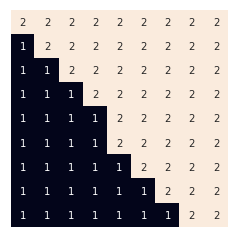

Episode 3300	Average Score: -0.20
0.7189118704973512


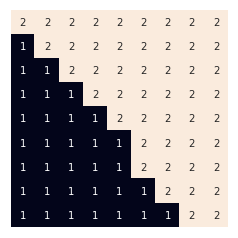

Episode 3400	Average Score: -0.19
0.7117582219632792


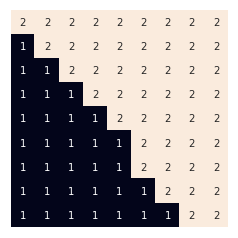

Episode 3500	Average Score: -0.21
0.7046757569628911


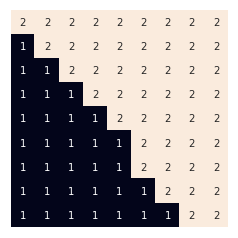

Episode 3600	Average Score: -0.19
0.697663767172952


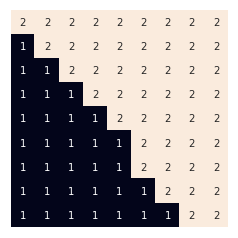

Episode 3700	Average Score: -0.13
0.6907215513185129


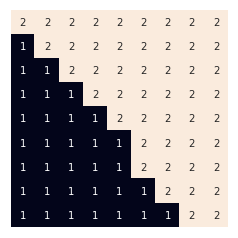

Episode 3800	Average Score: -0.10
0.6838484151027725


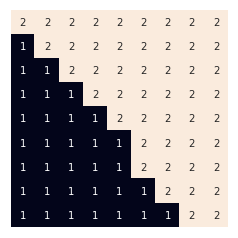

Episode 3900	Average Score: -0.07
0.6770436711376424


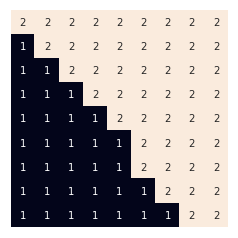

Episode 4000	Average Score: -0.05
0.6703066388750015


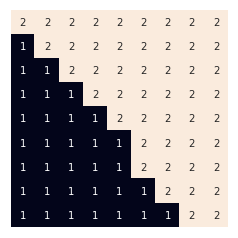

Episode 4100	Average Score: -0.01
0.6636366445386316


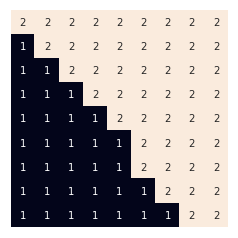

Episode 4200	Average Score: -0.10
0.657033021056833


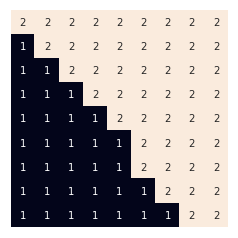

Episode 4300	Average Score: -0.01
0.6504951079957114


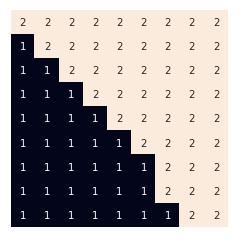

Episode 4400	Average Score: -0.13
0.6440222514931265


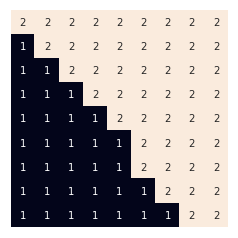

Episode 4500	Average Score: -0.10
0.6376138041932984


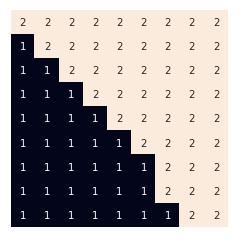

Episode 4600	Average Score: -0.15
0.6312691251820646


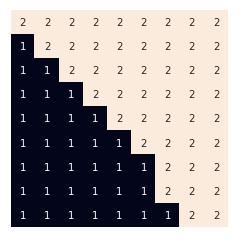

Episode 4700	Average Score: -0.16
0.6249875799227835


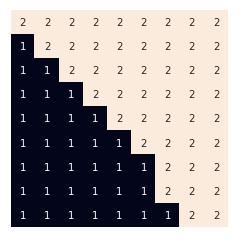

Episode 4800	Average Score: -0.18
0.6187685401928729


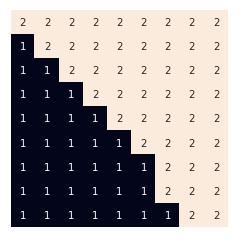

Episode 4900	Average Score: -0.13
0.6126113840209793


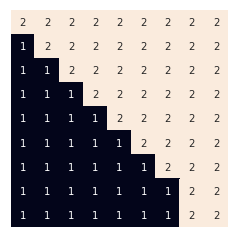

Episode 5000	Average Score: -0.01
0.6065154956247766


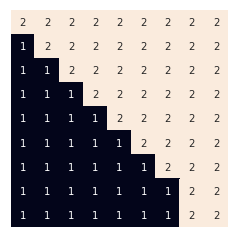

Episode 5100	Average Score: -0.17
0.6004802653493791


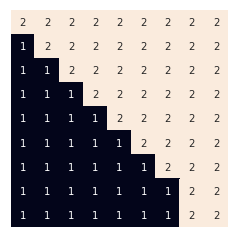

Episode 5200	Average Score: -0.05
0.594505089606372


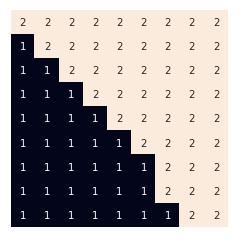

Episode 5300	Average Score: -0.13
0.5885893708134431


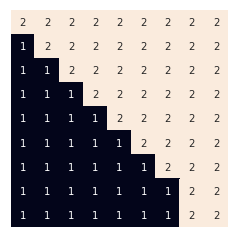

Episode 5400	Average Score: -0.03
0.5827325173346204


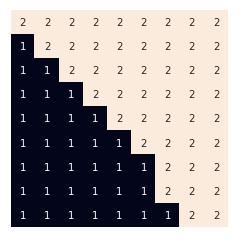

Episode 5500	Average Score: -0.16
0.5769339434210992


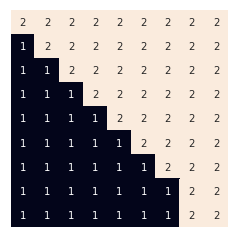

Episode 5600	Average Score: -0.22
0.5711930691526644


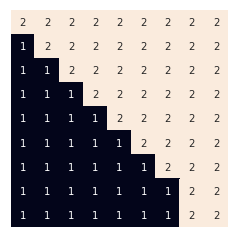

Episode 5700	Average Score: -0.06
0.565509320379691


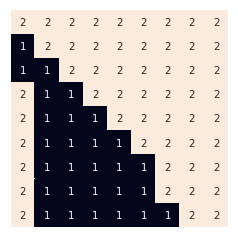

Episode 5800	Average Score: -0.22
0.5598821286657205


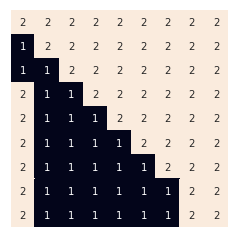

Episode 5900	Average Score: -0.16
0.5543109312306146


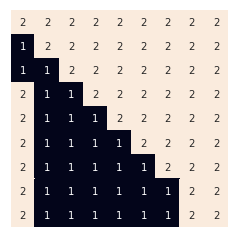

Episode 6000	Average Score: -0.15
0.5487951708942683


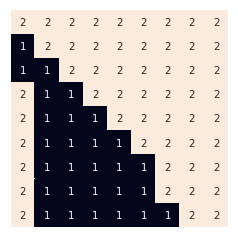

Episode 6100	Average Score: -0.11
0.5433342960208886


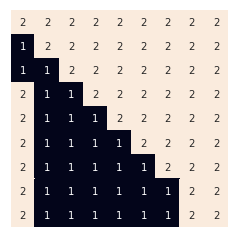

Episode 6200	Average Score: -0.05
0.5379277604638235


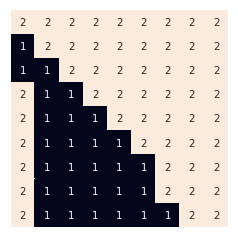

Episode 6300	Average Score: -0.08
0.5325750235109391


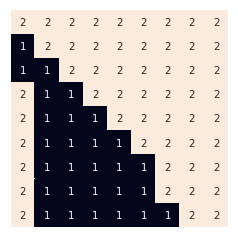

Episode 6400	Average Score: -0.09
0.5272755498305473


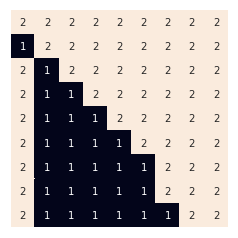

Episode 6500	Average Score: -0.15
0.5220288094178624


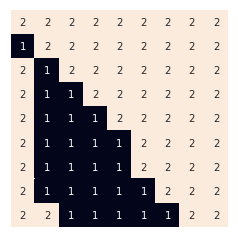

Episode 6600	Average Score: -0.16
0.5168342775419988


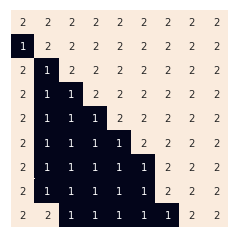

Episode 6700	Average Score: -0.13
0.5116914346934888


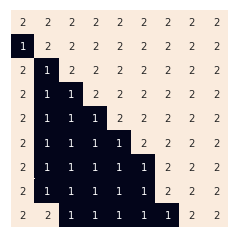

Episode 6800	Average Score: -0.19
0.506599766532328


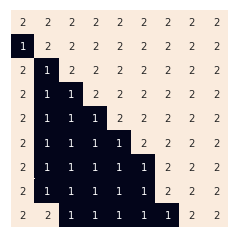

Episode 6900	Average Score: 0.020
0.5015587638365347


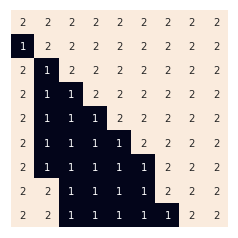

Episode 7000	Average Score: -0.06
0.496567922451223


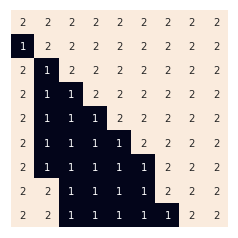

Episode 7100	Average Score: 0.000
0.4916267432381818


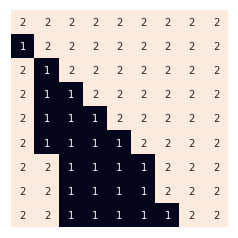

Episode 7200	Average Score: -0.06
0.4867347320259549


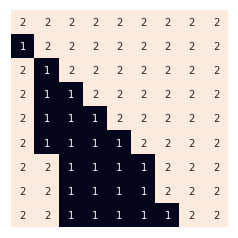

Episode 7300	Average Score: 0.021
0.48189139956041893


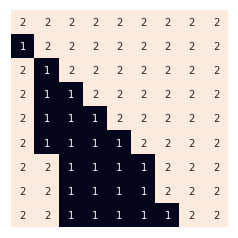

Episode 7400	Average Score: -0.09
0.4770962614558525


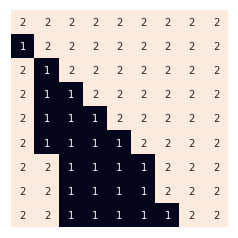

Episode 7500	Average Score: -0.09
0.4723488381464926


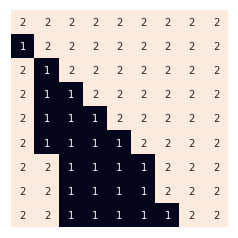

Episode 7600	Average Score: -0.12
0.467648654838573


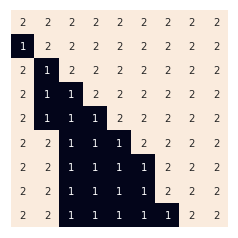

Episode 7700	Average Score: -0.09
0.46299524146283894


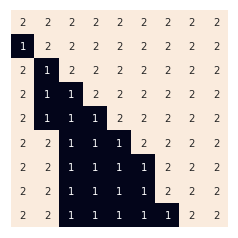

Episode 7800	Average Score: 0.120
0.4583881326275357


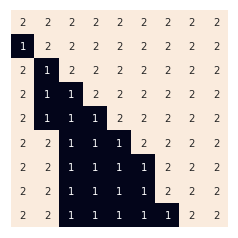

Episode 7900	Average Score: -0.05
0.45382686757186447


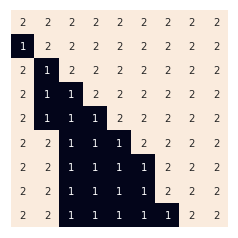

Episode 8000	Average Score: -0.08
0.4493109901199013


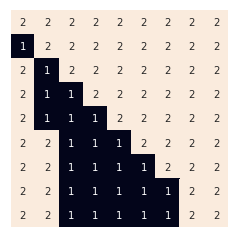

Episode 8100	Average Score: -0.05
0.44484004863497356


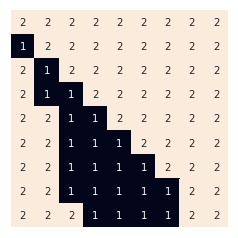

Episode 8200	Average Score: -0.07
0.4404135959744933


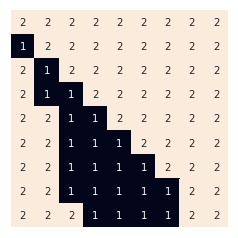

Episode 8300	Average Score: -0.01
0.4360311894452362


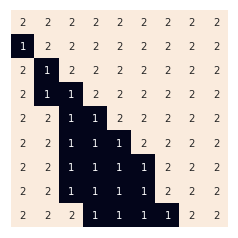

Episode 8400	Average Score: -0.05
0.4316923907590687


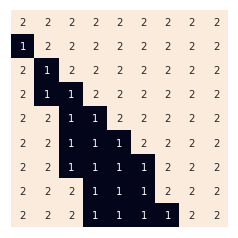

Episode 8500	Average Score: -0.02
0.42739676598911336


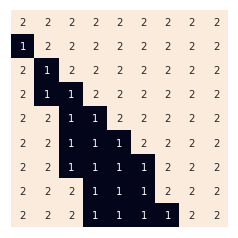

Episode 8600	Average Score: -0.05
0.42314388552635285


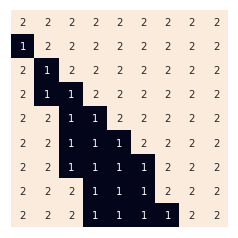

Episode 8700	Average Score: -0.09
0.4189333240366638


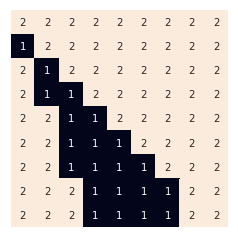

Episode 8800	Average Score: -0.02
0.41476466041827703


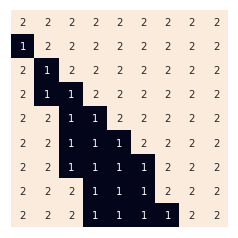

Episode 8900	Average Score: -0.09
0.41063747775966636


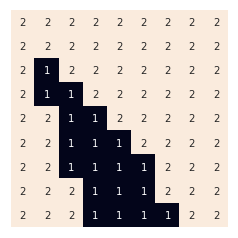

Episode 9000	Average Score: -0.14
0.4065513632978508


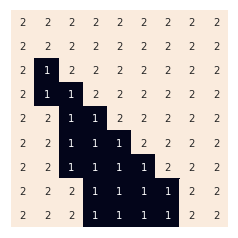

Episode 9100	Average Score: -0.03
0.40250590837711264


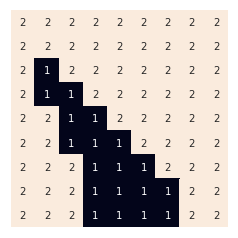

Episode 9200	Average Score: -0.16
0.39850070840813034


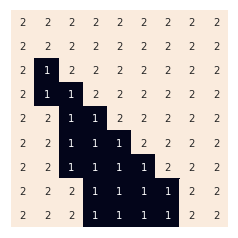

Episode 9300	Average Score: -0.03
0.39453536282751267


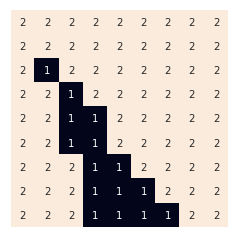

Episode 9400	Average Score: -0.08
0.3906094750577395


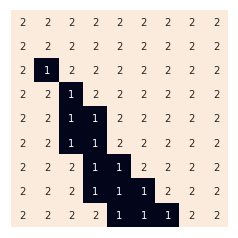

Episode 9500	Average Score: -0.17
0.3867226524674988


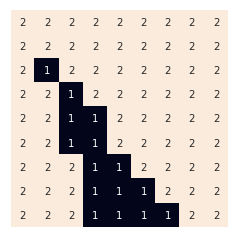

Episode 9600	Average Score: -0.13
0.38287450633242015


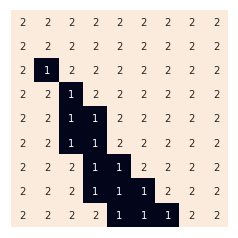

Episode 9700	Average Score: -0.12
0.3790646517961982


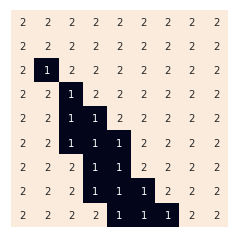

Episode 9800	Average Score: -0.03
0.375292707832101


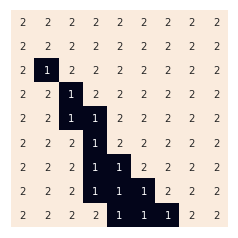

Episode 9900	Average Score: -0.03
0.37155829720486555


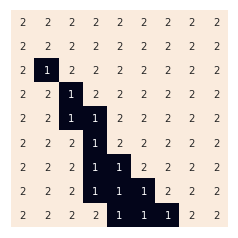

Episode 10000	Average Score: -0.26
0.3678610464329692


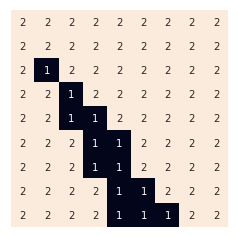

Episode 10100	Average Score: 0.011
0.36420058575127745


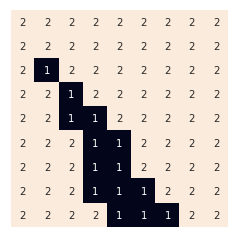

Episode 10200	Average Score: -0.20
0.36057654907406234


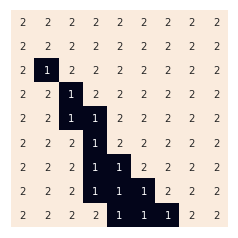

Episode 10300	Average Score: -0.14
0.35698857395839245


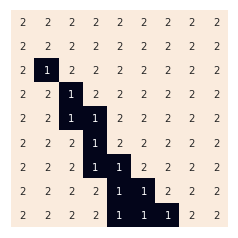

Episode 10400	Average Score: -0.13
0.35343630156788247


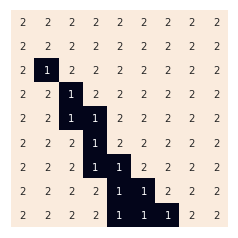

Episode 10500	Average Score: -0.08
0.34991937663680617


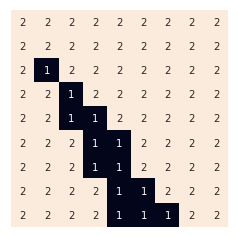

Episode 10600	Average Score: 0.091
0.34643744743456717


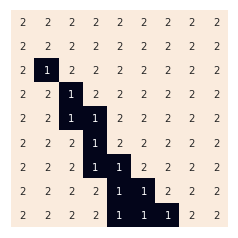

Episode 10700	Average Score: -0.13
0.34299016573052


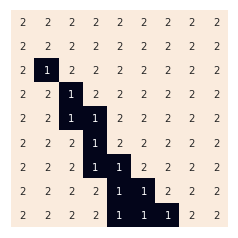

Episode 10800	Average Score: -0.10
0.33957718675914567


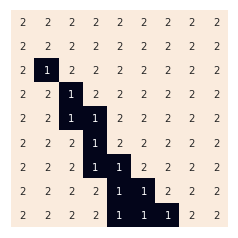

Episode 10900	Average Score: -0.07
0.3361981691855686


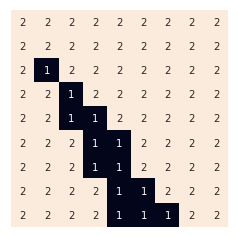

Episode 11000	Average Score: -0.10
0.33285277507142214


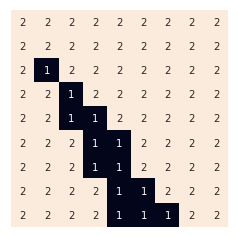

Episode 11100	Average Score: 0.041
0.32954066984104946


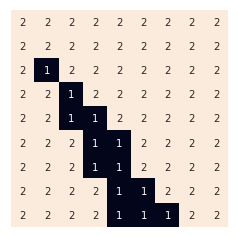

Episode 11200	Average Score: 0.02
0.32626152224804283


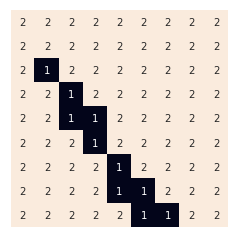

Episode 11300	Average Score: 0.020
0.32301500434211516


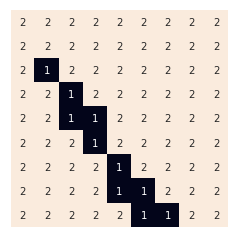

Episode 11400	Average Score: 0.03
0.3198007914363015


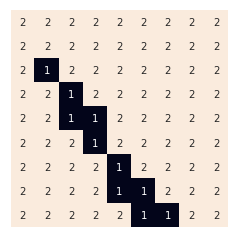

Episode 11500	Average Score: -0.06
0.3166185620744876


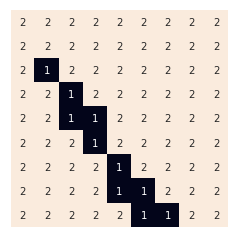

Episode 11600	Average Score: -0.18
0.31346799799925945


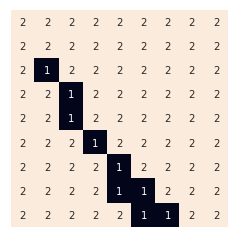

Episode 11700	Average Score: -0.03
0.3103487841200748


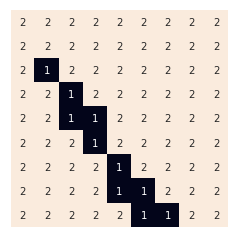

Episode 11800	Average Score: 0.021
0.30726060848175163


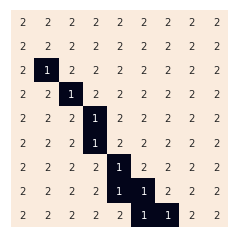

Episode 11900	Average Score: -0.05
0.3042031622332665


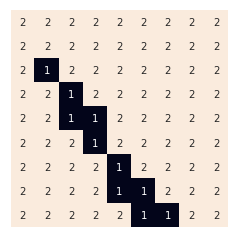

Episode 12000	Average Score: -0.01
0.30117613959686973


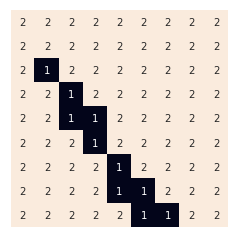

Episode 12100	Average Score: -0.10
0.2981792378375013


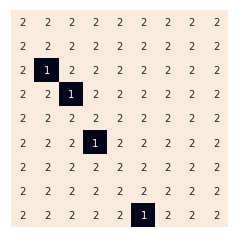

Episode 12200	Average Score: -0.06
0.2952121572325153


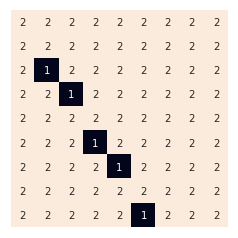

Episode 12300	Average Score: -0.03
0.29227460104170494


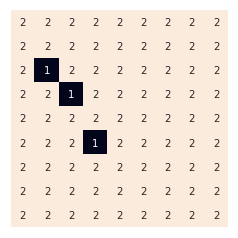

Episode 12400	Average Score: -0.09
0.28936627547762456


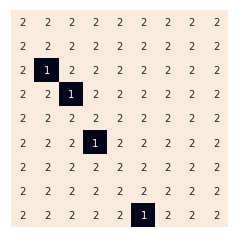

Episode 12500	Average Score: 0.070
0.28648688967620767


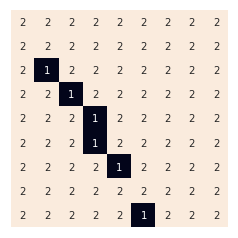

Episode 12600	Average Score: 0.021
0.28363615566767725


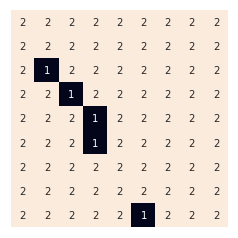

Episode 12700	Average Score: 0.001
0.2808137883477466


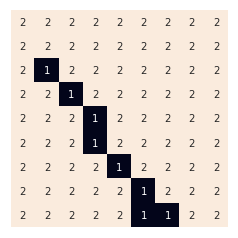

Episode 12800	Average Score: 0.07
0.27801950544910525


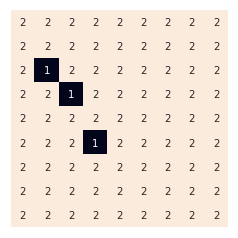

Episode 12900	Average Score: 0.061
0.2752530275131885


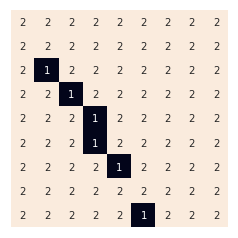

Episode 13000	Average Score: -0.02
0.27251407786223053


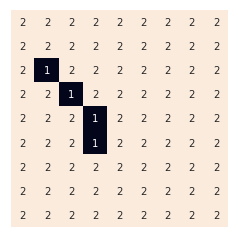

Episode 13100	Average Score: 0.070
0.26980238257159034


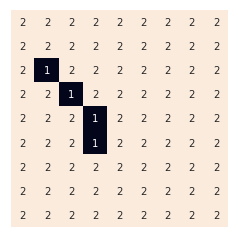

Episode 13200	Average Score: -0.01
0.26711767044235935


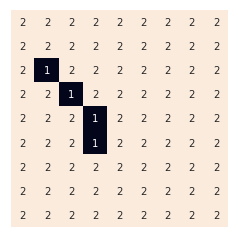

Episode 13300	Average Score: 0.070
0.2644596729742376


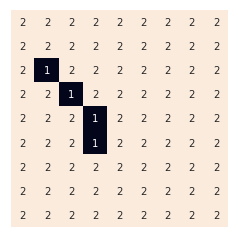

Episode 13400	Average Score: -0.06
0.2618281243386805


KeyboardInterrupt: 

In [11]:
def dqn(n_episodes=200000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward, done = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state, done)
            state = next_state
            score += reward_val
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print(eps)
            policy = agent.extractPolicy()
            plt.imshow(policy)
            ax = sns.heatmap(policy, annot=True)
            cb = ax.collections[-1].colorbar   
            cb.remove()
            plt.xticks([])
            plt.yticks([])
            plt.show()
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [4]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  